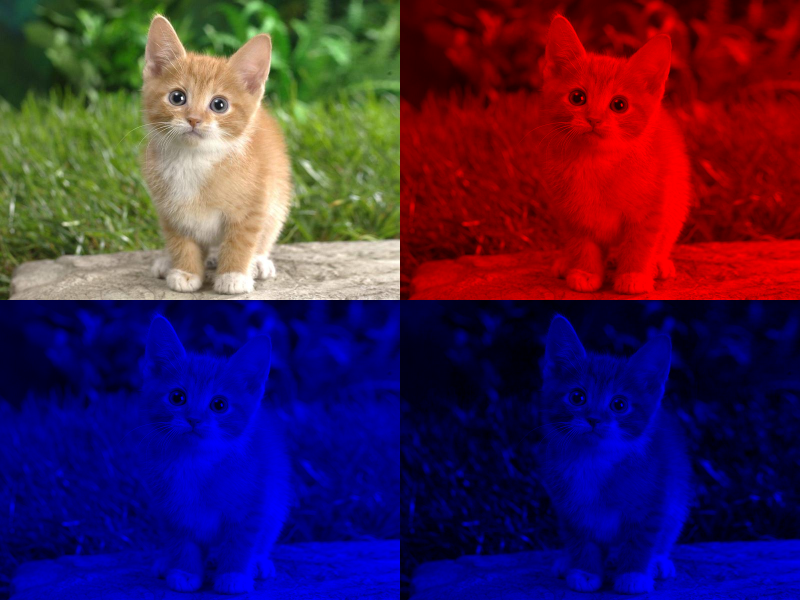

In [22]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Colab için gerekli

# Görüntüyü yükleme
original_image = cv2.imread('cat1.jpg')

# Görüntü boyutları
original_height, original_width = original_image.shape[:2]

# Görüntüyü yeniden boyutlandırma (0.5 oranında küçültme)
resized_image = cv2.resize(original_image,  (int(original_width * 0.5), int(original_height * 0.5)))

# HSV formatına dönüştürme
hsv_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2HSV)

# H ve S kanallarını sıfırlama, sadece V kanalını bırakma
hsv_image[:, :, 1] = 0  # S kanalını sıfırla
hsv_image[:, :, 0] = 0  # H kanalını sıfırla

# V kanalı
value_channel = hsv_image[:, :, 2]  # V kanalını al

# V kanalını 3 kanala genişletme (BGR formatına uyum sağlamak için)
value_channel_bgr = np.zeros_like(resized_image)  # Tüm görüntüyü sıfırlarla doldur
value_channel_bgr[:, :, 2] = value_channel  # V kanalını B kanalına ekle

# LAB formatına dönüştürme
lab_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2Lab)

# A ve B kanallarını sıfırlama, sadece L kanalını bırakma
lab_image[:, :, 1] = 0  # A kanalını sıfırla
lab_image[:, :, 2] = 0  # B kanalını sıfırla

# L kanalı
lab_l_channel = lab_image[:, :, 0]  # L kanalını al

# L kanalını 3 kanala genişletme (BGR formatına uyum sağlamak için)
lab_channel_bgr = np.zeros_like(resized_image)  # Tüm görüntüyü sıfırlarla doldur
lab_channel_bgr[:, :, 0] = lab_l_channel  # L kanalını B kanalına ekle

# RGB formatından sadece Mavi (Blue) kanalını alma
blue_channel = resized_image[:, :, 0]  # Mavi kanal

# Mavi kanalın sadece mavi tonunu göstermek için 3 kanalda sadece mavi kanal kullanılır
blue_colored = np.zeros_like(resized_image)  # Tüm görüntüyü sıfırlarla doldur
blue_colored[:, :, 0] = blue_channel  # Sadece mavi kanal

# Görüntüleri yatayda birleştirme (orijinal ve V kanalı)
top_row = np.hstack((resized_image, value_channel_bgr))  # Sol üst: orijinal, Sağ üst: V kanalı

# Görüntüleri yatayda birleştirme (LAB kanalı ve Mavi kanalı)
bottom_row = np.hstack((lab_channel_bgr, blue_colored))  # Sol alt: LAB L kanalı, Sağ alt: Mavi kanalı

# Son görüntüyü dikeyde birleştirme
final_image = np.vstack((top_row, bottom_row))

# Orijinal boyutla eşleştirmek için son görüntüyü yeniden boyutlandırma
final_image_resized = cv2.resize(final_image, (original_width, original_height))

# Son görüntüyü gösterme
cv2_imshow(final_image_resized)  # Colab için cv2_imshow kullanılıyor

# Son görüntüyü kaydetmek için
cv2.imwrite('final_image_resized.jpg', final_image_resized)  # Görüntüyü kaydet

cv2.waitKey(0)
cv2.destroyAllWindows()


Flipped Image (Horizontal):


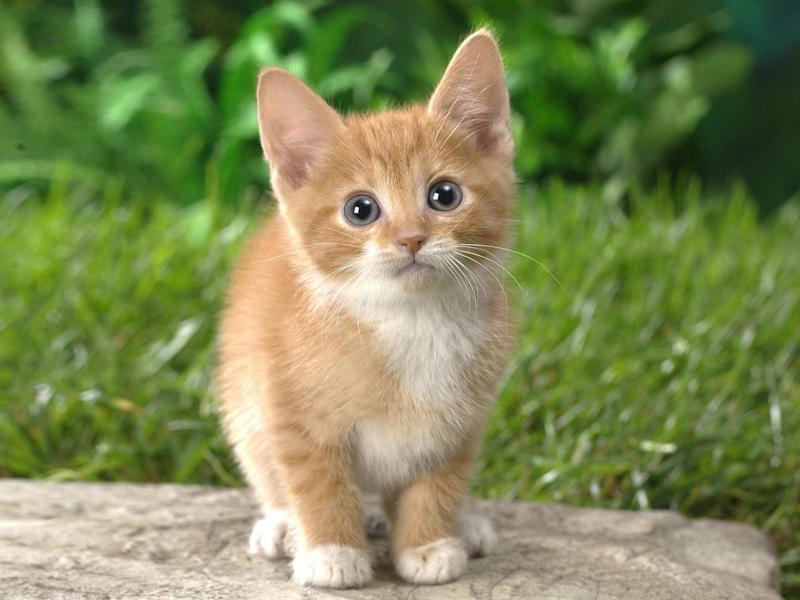

Rotated Image (90 Degrees):


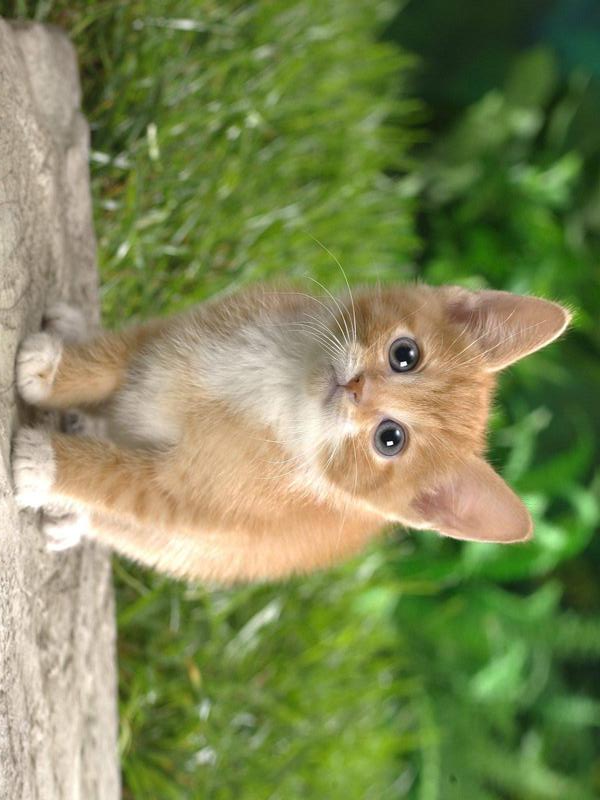

Rotated Image (45 Degrees):


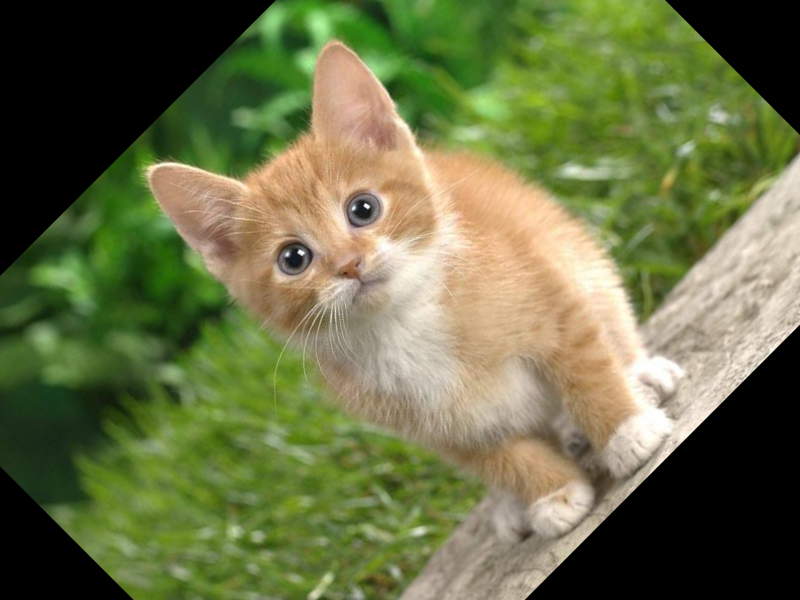

Image with 100x100 Region Set to Zeros (Region starts at x=338, y=382):


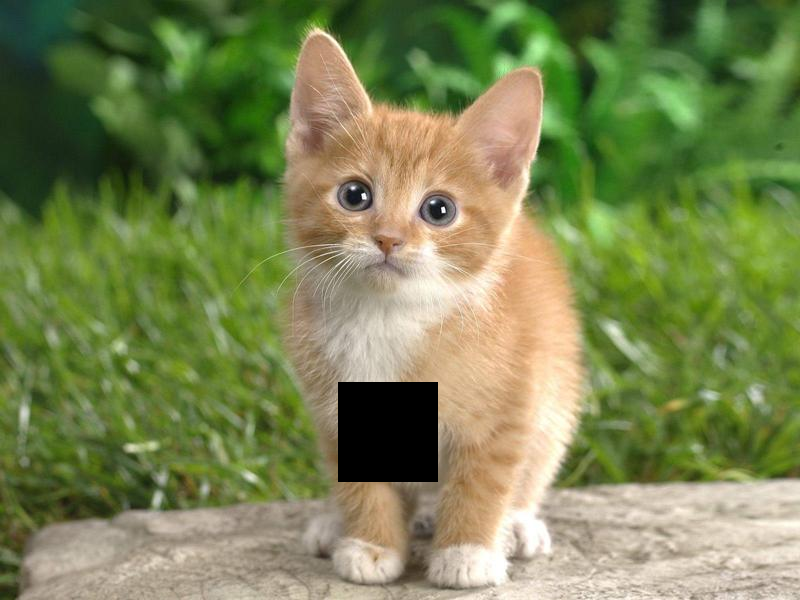

In [26]:
import cv2
import numpy as np
import random
from google.colab.patches import cv2_imshow  # For displaying in Colab

# Load the original image
cat_image = cv2.imread('cat1.jpg')  # Update with the correct path to your image

# Check if the image loaded correctly
if cat_image is None:
    print("Error: Image not found or failed to load.")
else:
    # 1. Flip the original image horizontally
    flipped_image = cv2.flip(cat_image, 1)  # 1 means horizontal flip

    # 2. Rotate the original image by 90 degrees
    rotated_90_image = cv2.rotate(cat_image, cv2.ROTATE_90_CLOCKWISE)

    # 3. Rotate the original image by 45 degrees (custom rotation)
    (h, w) = cat_image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)  # Rotate by 45 degrees
    rotated_45_image = cv2.warpAffine(cat_image, rotation_matrix, (w, h))

    # 4. Randomly make zeros for a 100x100 region of the original image
    random_x = random.randint(0, w - 100)  # Random x position
    random_y = random.randint(0, h - 100)  # Random y position
    image_with_zeros = cat_image.copy()  # Make a copy of the original image
    image_with_zeros[random_y:random_y + 100, random_x:random_x + 100] = 0  # Set 100x100 region to 0 (black)

    # Show the results using cv2_imshow (for Colab)
    print("Flipped Image (Horizontal):")
    cv2_imshow(flipped_image)

    print("Rotated Image (90 Degrees):")
    cv2_imshow(rotated_90_image)

    print("Rotated Image (45 Degrees):")
    cv2_imshow(rotated_45_image)

    print(f"Image with 100x100 Region Set to Zeros (Region starts at x={random_x}, y={random_y}):")
    cv2_imshow(image_with_zeros)


Number of blue Xs: 26


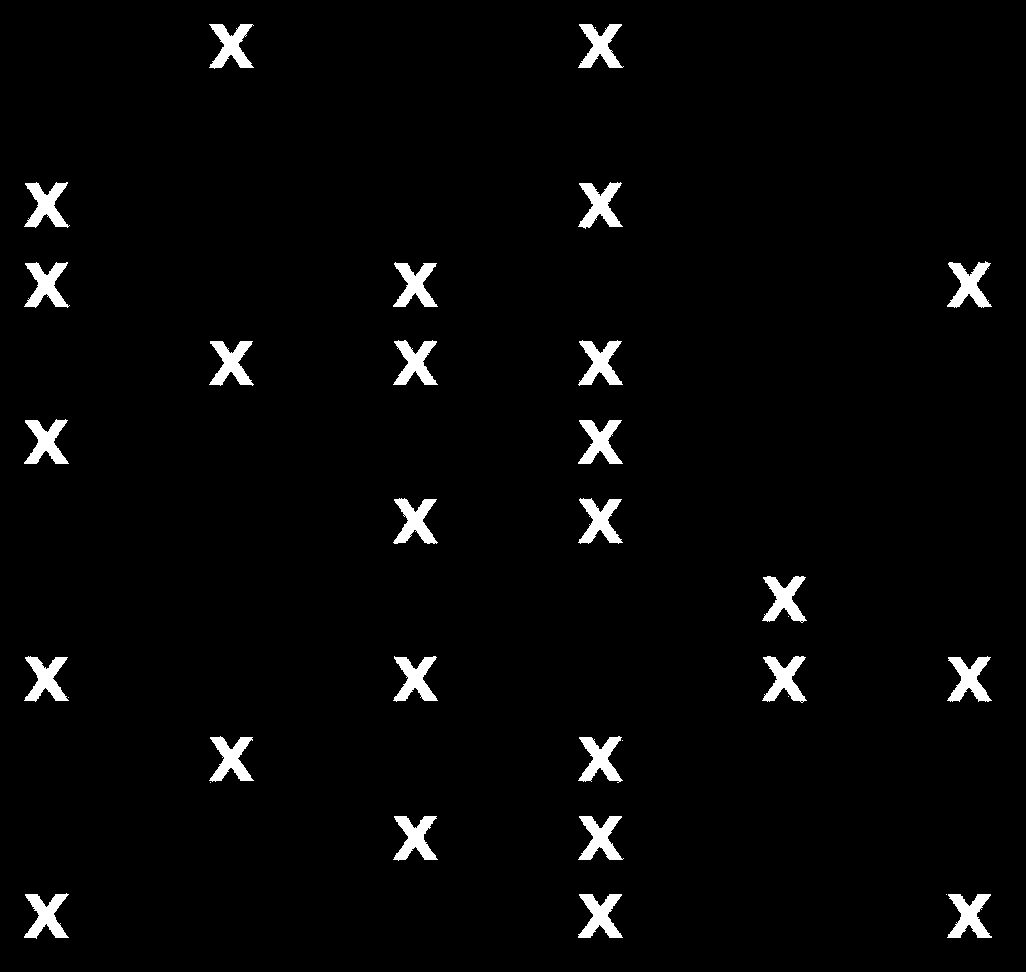

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Colab için gerekli

# Load the X and O image
x_o_image = cv2.imread('red_x.png')

# Convert image to HSV color space
hsv_image = cv2.cvtColor(x_o_image, cv2.COLOR_BGR2HSV)

# Adjust these values based on the specific blue color in your image
lower_blue = np.array([90, 50, 50])  # Lower range for blue in HSV
upper_blue = np.array([130, 255, 255])  # Upper range for blue in HSV

# Create a mask for blue regions
mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Find contours from the mask
contours, _ = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a counter for blue X's
num_blue_xs = 0

# Filter contours by shape and area to count only "X" shapes
for contour in contours:
    # Get the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Define a minimum and maximum area for an "X" (to filter out noise)
    area = cv2.contourArea(contour)

    # Check if the contour is approximately square (aspect ratio close to 1)
    aspect_ratio = float(w) / h
    if 0.9 < aspect_ratio < 1.1 and area > 100:  # Adjust area threshold if needed
        num_blue_xs += 1

print(f'Number of blue Xs: {num_blue_xs}')

# Show the mask to verify detection
cv2_imshow(mask_blue)


In [6]:
from google.colab import files
uploaded = files.upload()

Saving red_x.png to red_x.png


# Yeni Bölüm